In [2]:
#@title Imports
import os
import mne
import pickle
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive, files

from Inner_Speech_Dataset.Python_Processing.Data_extractions import  Extract_data_from_subject, Extract_data_multisubject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Select_time_window, Transform_for_classificator, Split_trial_in_time

np.random.seed(23)

mne.set_log_level(verbose='warning') #to avoid info at terminal
warnings.filterwarnings(action = "ignore", category = DeprecationWarning )
warnings.filterwarnings(action = "ignore", category = FutureWarning )

In [3]:
### Hyperparameters

# The root dir have to point to the folder that cointains the database
root_dir = "A:/trial"

# Data Type
datatype = "EEG"

# Sampling rate
fs = 256

# Select the useful par of each trial. Time in seconds
t_start = 1.5
t_end = 3.5

# Subject number
N_S = 1   #[1 to 10]

N_S_list = list(np.arange(1,11))

In [4]:
#@title Data extraction and processing

# Load all trials for a sigle subject
# X, Y = Extract_data_from_subject(root_dir, N_S, datatype)

X, Y = Extract_data_multisubject(root_dir, N_S_list, datatype)

# Cut usefull time. i.e action interval
X = Select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)

Iteration  0
Subject  1
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  1
Subject  2
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  2
Subject  3
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  3
Subject  4
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  4
Subject  5
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  5
Subject  6
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  6
Subject  7
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  7
Subject  8
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  8
Subject  9
Inner iteration  1
Inner iteration  2
Inner iteration  3
Iteration  9
Subject  10
Inner iteration  1
Inner iteration  2
Inner iteration  3
Saving element 0 into array 
Saving element 1 into array 
Saving element 2 into array 
Saving element 3 into array 
Saving element 4 into array 
Saving element 5 into array 
Saving element 

In [5]:
print("Data shape: [trials x channels x samples]")
print(X.shape) # Trials, channels, samples

print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session

Data shape: [trials x channels x samples]
(5640, 128, 512)
Labels shape
(5640, 4)


In [6]:
# # Conditions to compared
# Conditions = [["Inner"],["Inner"]]
# # The class for the above condition
# Classes    = [  ["Up"] ,["Down"] ]

# # Conditions to compared
# Conditions = [["Inner"],["Inner"], ["Inner"]]
# # The class for the above condition
# Classes    = [  ["Up"] ,["Down"], ["Right"] ]

# Conditions to compared
Conditions = [["Inner"],["Inner"], ["Inner"], ["Inner"]]
# The class for the above condition
Classes    = [  ["Up"] ,["Down"], ["Right"], ["Left"] ]

In [7]:
# Transform data and keep only the trials of interes
X , Y =  Transform_for_classificator(X, Y, Classes, Conditions)

In [8]:
print("Final data shape")
print(X.shape)

print("Final labels shape")
print(Y.shape)

Final data shape
(2236, 128, 512)
Final labels shape
(2236,)


In [9]:
import numpy as np
# from scipy.signal import welch
#
# def extract_psd(X, fs):
#     psd_features = []
#     for trial in X:
#         psd_trial = []
#         for channel in trial:
#             freqs, psd = welch(channel, fs=fs)  # Use your sampling frequency
#             psd_trial.append(psd)
#         psd_features.append(psd_trial)
#     return np.array(psd_features)
#
# # Assuming your EEG data X has shape (Trials, Channels, Samples)
# # Call the function to extract PSD features
# X_PSD = extract_psd(X, fs)
#
# # The shape of X_PSD will be (Trials, Channels, Frequencies)
# # You can apply other feature extraction techniques similarly

In [10]:
Trials = X.shape[0]
Channels = X.shape[1]
Samples = X.shape[2]

In [11]:
# Flatten the EEG data to (Trials, Channels * Samples)
X_flattened = X.reshape(Trials, -1)

# X_PSD_flattened = X_PSD.reshape(Trials, -1)

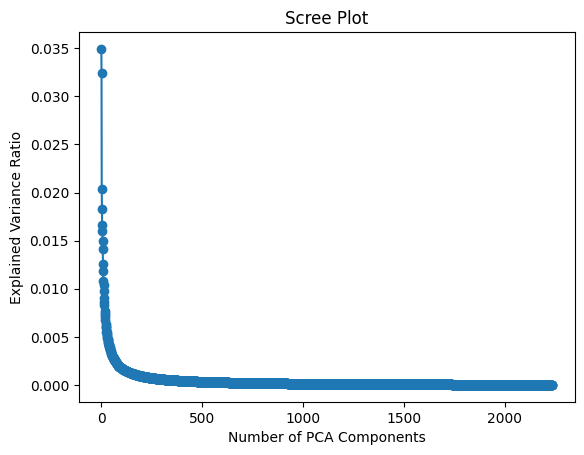

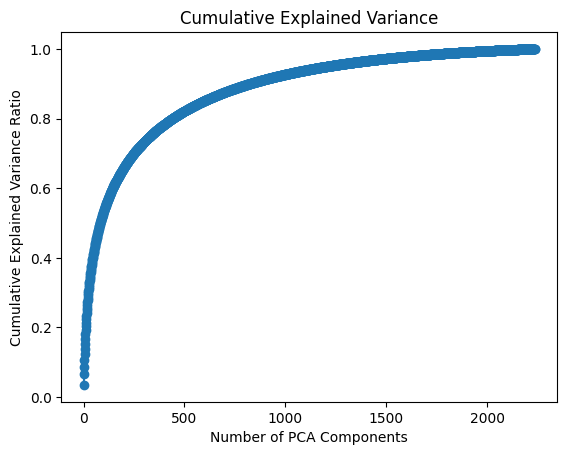

In [11]:
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
#
# # Apply PCA
# pca = PCA()  # Choose the desired number of components
# X_pca = pca.fit_transform(X_flattened)
#
# # Calculate the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
#
# # Calculate the cumulative explained variance ratio
# cumulative_variance = np.cumsum(explained_variance_ratio)
#
# # Plot the explained variance ratio
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
# plt.xlabel('Number of PCA Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()
#
# # Plot the cumulative explained variance ratio
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.xlabel('Number of PCA Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance')
# plt.show()

In [12]:
# # EEG Data
#
#
# # Apply PCA
# pca = PCA(n_components=1000)  # Choose the desired number of components
# X_pca = pca.fit_transform(X_flattened)
#
# # Apply SelectKBest with ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k=1000)  # Choose the desired number of features
# X_selected = selector.fit_transform(X_flattened, Y.ravel())
#
# # Print the shapes of the reduced feature sets
# print("PCA reduced shape:", X_pca.shape)
# print("SelectKBest reduced shape:", X_selected.shape)

PCA reduced shape: (2236, 1000)
SelectKBest reduced shape: (2236, 1000)


In [21]:
# # EEG PSD Data
#
# # Apply PCA
# pca = PCA(n_components=1000)  # Choose the desired number of components
# X_PSD_pca = pca.fit_transform(X_PSD_flattened)
#
# # Apply SelectKBest with ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k=1000)  # Choose the desired number of features
# X_PSD_selected = selector.fit_transform(X_PSD_flattened, Y.ravel())
#
# # Print the shapes of the reduced feature sets
# print("PSD-PCA reduced shape:", X_PSD_pca.shape)
# print("SelectKBest PSD-reduced shape:", X_PSD_selected.shape)

PSD-PCA reduced shape: (2236, 1000)
SelectKBest PSD-reduced shape: (2236, 1000)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def train_model(X, Y=Y, test_size=0.3, random_state=42):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Define a list of classifiers to try
    classifiers = [
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier()
    ]

    # Loop over each classifier and evaluate its performance
    for clf in classifiers:
        clf.fit(X_train, y_train)  # Train the classifier
        y_pred = clf.predict(X_test)  # Make predictions on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        # f1 = f1_score(y_test, y_pred)  # Calculate F1 score
        cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

        print(f"Classifier: {clf.__class__.__name__}")
        print("Confusion Matrix:")
        print(cm)
        print("Accuracy:", accuracy)
        # print("F1 Score:", f1)
        print("-------------------------------")

In [24]:
# train_model(X_PSD_flattened)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[61 51 48 24]
 [44 50 33 35]
 [52 45 36 27]
 [45 54 43 23]]
Accuracy: 0.2533532041728763
-------------------------------
Classifier: SVC
Confusion Matrix:
[[  0   3 179   2]
 [  2   7 151   2]
 [  0   8 150   2]
 [  0   1 161   3]]
Accuracy: 0.23845007451564829
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------


In [25]:
# train_model(X_pca)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[30 34 66 54]
 [33 31 53 45]
 [22 30 63 45]
 [27 30 52 56]]
Accuracy: 0.26825633383010433
-------------------------------
Classifier: SVC
Confusion Matrix:
[[28 32 81 43]
 [37 42 44 39]
 [36 37 48 39]
 [36 37 48 44]]
Accuracy: 0.2414307004470939
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[39 52 48 45]
 [40 40 40 42]
 [34 42 40 44]
 [35 41 49 40]]
Accuracy: 0.23695976154992549
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[43 46 47 48]
 [38 43 47 34]
 [32 42 58 28]
 [31 61 44 29]]
Accuracy: 0.2578241430700447
-------------------------------


In [26]:
# train_model(X_selected)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[40 40 50 54]
 [40 46 38 38]
 [30 39 56 35]
 [43 40 38 44]]
Accuracy: 0.27719821162444114
-------------------------------
Classifier: SVC
Confusion Matrix:
[[53 42 44 45]
 [35 65 29 33]
 [40 33 54 33]
 [38 25 35 67]]
Accuracy: 0.3561847988077496
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[45 43 55 41]
 [29 47 51 35]
 [30 44 40 46]
 [33 38 36 58]]
Accuracy: 0.28315946348733234
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[44 46 40 54]
 [35 47 34 46]
 [30 33 49 48]
 [31 44 39 51]]
Accuracy: 0.2846497764530551
-------------------------------


In [27]:
# train_model(X_PSD_pca)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[61 52 47 24]
 [45 48 33 36]
 [51 46 36 27]
 [44 55 42 24]]
Accuracy: 0.2518628912071535
-------------------------------
Classifier: SVC
Confusion Matrix:
[[  0   3 179   2]
 [  2   7 151   2]
 [  0   8 150   2]
 [  0   1 161   3]]
Accuracy: 0.23845007451564829
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------


In [28]:
# train_model(X_PSD_selected)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[47 57 47 33]
 [49 49 35 29]
 [58 40 42 20]
 [54 35 42 34]]
Accuracy: 0.2563338301043219
-------------------------------
Classifier: SVC
Confusion Matrix:
[[ 13  53 107  11]
 [ 12  49  90  11]
 [ 13  40  97  10]
 [ 11  41  94  19]]
Accuracy: 0.26527570789865873
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[  0   0 184   0]
 [  0   0 162   0]
 [  0   0 160   0]
 [  0   0 165   0]]
Accuracy: 0.23845007451564829
-------------------------------


In [33]:
# # Instantiate the LDA classifier
# lda = LinearDiscriminantAnalysis(n_components=3)  # Specify the desired number of components
#
# # Fit the LDA model
# lda.fit(X_selected, Y.ravel())
#
# # Transform the data to the reduced-dimensional space
# X_lda = lda.transform(X_selected)
#
# # The shape of X_lda will be (Trials, k)
#
# train_model(X_lda)

Classifier: KNeighborsClassifier
Confusion Matrix:
[[137  18  13  16]
 [ 14 132   7   9]
 [ 10  14 124  12]
 [ 17  17  11 120]]
Accuracy: 0.7645305514157973
-------------------------------
Classifier: SVC
Confusion Matrix:
[[136  20  13  15]
 [  9 133  11   9]
 [ 10   8 130  12]
 [  8  17  12 128]]
Accuracy: 0.7853949329359166
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[122  23  11  28]
 [ 14 121  17  10]
 [ 15  13 116  16]
 [ 20  15  14 116]]
Accuracy: 0.7078986587183308
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[137  19  11  17]
 [ 13 132   8   9]
 [ 12   9 124  15]
 [ 10  15  11 129]]
Accuracy: 0.7779433681073026
-------------------------------


----

100%|██████████| 20/20 [01:26<00:00,  4.31s/it]


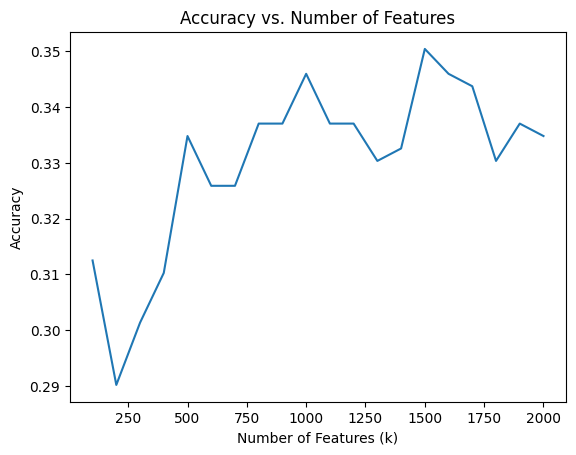

Best k: 1500
Maximum Accuracy: 0.35044642857142855


In [37]:
# # Define the range of k values
# k_values = np.arange(100, 2001, 100)
#
# # Initialize lists to store accuracy and k values
# accuracies = []
# best_k = 0
# max_accuracy = 0.0
#
# # Iterate over k values
# for k in tqdm(k_values):
#     # Apply SelectKBest with ANOVA F-value
#     selector = SelectKBest(score_func=f_classif, k=k)
#     X_selected = selector.fit_transform(X_flattened, Y.ravel())
#
#     # Split the data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
#
#     # Create and fit the SVC classifier
#     classifier = SVC()
#     classifier.fit(X_train, y_train)
#
#     # Make predictions on the test set
#     y_pred = classifier.predict(X_test)
#
#     # Calculate accuracy and store the maximum accuracy and corresponding k value
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
#
#     if accuracy > max_accuracy:
#         max_accuracy = accuracy
#         best_k = k
#
# # Plot the accuracy vs. k values
# plt.plot(k_values, accuracies)
# plt.xlabel('Number of Features (k)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Number of Features')
# plt.show()
#
# print("Best k:", best_k)
# print("Maximum Accuracy:", max_accuracy)

In [19]:
# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=1500)  # Choose the desired number of features
X_selected = selector.fit_transform(X_flattened, Y.ravel())

# Print the shapes of the reduced feature sets
print("SelectKBest PSD-reduced shape:", X_selected.shape)


# Instantiate the LDA classifier
lda = LinearDiscriminantAnalysis(n_components=3)  # Specify the desired number of components

# Fit the LDA model
lda.fit(X_selected, Y.ravel())

# Transform the data to the reduced-dimensional space
X_lda = lda.transform(X_selected)

# The shape of X_lda will be (Trials, k)

train_model(X_lda)

SelectKBest PSD-reduced shape: (2236, 1500)
Classifier: KNeighborsClassifier
Confusion Matrix:
[[169   2   3  10]
 [  2 155   2   3]
 [  3   2 153   2]
 [  4   4   5 152]]
Accuracy: 0.9374068554396423
-------------------------------
Classifier: SVC
Confusion Matrix:
[[168   3   4   9]
 [  4 154   1   3]
 [  3   2 153   2]
 [  6   2   2 155]]
Accuracy: 0.9388971684053651
-------------------------------
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[163   8   4   9]
 [  5 149   2   6]
 [  2   6 147   5]
 [  6   3   5 151]]
Accuracy: 0.9090909090909091
-------------------------------
Classifier: RandomForestClassifier
Confusion Matrix:
[[168   4   3   9]
 [  3 155   1   3]
 [  5   2 153   0]
 [  5   3   3 154]]
Accuracy: 0.9388971684053651
-------------------------------


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, Y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_classifier = rf_grid_search.best_estimator_

# SVC Classifier
svc_classifier = SVC(random_state=42)
svc_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
svc_grid_search = GridSearchCV(svc_classifier, svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)
svc_best_classifier = svc_grid_search.best_estimator_

# XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
xgb_best_classifier = xgb_grid_search.best_estimator_

# Make predictions on the test set
rf_y_pred = rf_best_classifier.predict(X_test)
svc_y_pred = svc_best_classifier.predict(X_test)
xgb_y_pred = xgb_best_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("SVC Accuracy:", svc_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("SVC Best Parameters:", svc_grid_search.best_params_)
print("XGBoost Best Parameters:", xgb_grid_search.best_params_)

Random Forest Accuracy: 0.9397321428571429
SVC Accuracy: 0.9486607142857143
XGBoost Accuracy: 0.9375
Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
SVC Best Parameters: {'C': 10, 'kernel': 'linear'}
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, Y, test_size=0.2, random_state=42)

# Train the SVC model with best parameters
svc_classifier = SVC(C=10, kernel='linear')
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       130
         1.0       0.96      0.93      0.95       102
         2.0       0.97      0.97      0.97       108
         3.0       0.94      0.96      0.95       108

    accuracy                           0.95       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.95      0.95      0.95       448

Confusion Matrix:
[[121   2   2   5]
 [  4  95   1   2]
 [  2   1 105   0]
 [  3   1   0 104]]
Accuracy: 0.9486607142857143
